In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

#### Question 1-

In [ ]:
# Checking version of Tensorflow and Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


#### Question 2-

In [8]:
df1=pd.read_csv("winequality-red.csv")

In [9]:
df1.shape

(1599, 12)

In [10]:
#0 category for red wine
df1['type']=0

In [11]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [12]:
import csv
reader = csv.reader(
    open("winequality-white.csv"), delimiter=";")

In [13]:
df2=pd.DataFrame(reader)

In [14]:
df2.columns=df2.iloc[0]

In [15]:
df2=df2.tail(-1)
# 1 category for white wine
df2['type']=1
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6,1
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6,1
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6,1
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,1
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,1


In [16]:
df=pd.concat([df1,df2])

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,0
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [18]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4894,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6,1
4895,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5,1
4896,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,1
4897,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,1
4898,6,0.21,0.38,0.8,0.02,22,98,0.98941,3.26,0.32,11.8,6,1


In [19]:
df.shape

(6497, 13)

#### Question 3-

In [20]:
# checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

#### Question 4-

In [21]:
X=df.iloc[:,:-1]
y=df['type']

In [22]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6
4895,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5
4896,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
4897,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7


#### Question 5-

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
X_train,X_validation,y_train,y_validation=train_test_split(X_train_full,y_train_full,test_size=0.25,random_state=42)

#### Question 6-

In [26]:
#performing the scaling on X_train,x_validation and X_test dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [27]:
X.shape

(6497, 12)

In [28]:
X_train=scaler.fit_transform(X_train)
X_validation=scaler.fit_transform(X_validation)
X_test=scaler.transform(X_test)

#### Question 7-

In [29]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=(12,), name="inputLayer"),
          tf.keras.layers.Dense(300,activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(1, activation="sigmoid", name="outputLayer")]



#### Question 8-

In [30]:
model = tf.keras.models.Sequential(LAYERS)

In [31]:
model

In [32]:
model.layers

#### Question 12-

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 12)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               3900      
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 34,101
Trainable params: 34,101
Non-trainable params: 0
_________________________________________________________________


In [34]:
hidden1=model.layers[0]
hidden1.name

'inputLayer'

In [35]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_validation = np.asarray(X_validation).astype(np.float32)
y_validation = np.asarray(y_validation).astype(np.float32)

#### Question 13-

In [36]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

#### Question 14-

In [37]:
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


#### Question 9-
#### Tensorboard Callback function

In [38]:
# Logging

import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_07_10_06_30_11


#### Question 10-
#### Early Stopping Callback

In [40]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

#### Question 11-
#### Model Checkpointing Callback

In [39]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [41]:
X_validation.shape

(1137, 12)

In [42]:
y_validation.shape

(1137,)

#### Question 15-

In [44]:
# training of our model

EPOCHS = 30
VALIDATION_SET=(X_validation, y_validation)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])


Epoch 1/30
107/107 [==============================] - 1s 5ms/step - loss: 0.0439 - accuracy: 0.9856 - val_loss: 0.0669 - val_accuracy: 0.9815
Epoch 2/30
107/107 [==============================] - 1s 5ms/step - loss: 0.0374 - accuracy: 0.9897 - val_loss: 0.0797 - val_accuracy: 0.9780
Epoch 3/30
107/107 [==============================] - 1s 5ms/step - loss: 0.0322 - accuracy: 0.9927 - val_loss: 0.0726 - val_accuracy: 0.9798
Epoch 4/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9906 - val_loss: 0.1365 - val_accuracy: 0.9560
Epoch 5/30
107/107 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9927 - val_loss: 0.1861 - val_accuracy: 0.9455
Epoch 6/30
107/107 [==============================] - 1s 5ms/step - loss: 0.0289 - accuracy: 0.9938 - val_loss: 0.0761 - val_accuracy: 0.9789


In [45]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=10,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/10
107/107 [==============================] - 3s 7ms/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.0582 - val_accuracy: 0.9859
Epoch 2/10
107/107 [==============================] - 1s 6ms/step - loss: 0.0372 - accuracy: 0.9886 - val_loss: 0.0737 - val_accuracy: 0.9798
Epoch 3/10
107/107 [==============================] - 1s 7ms/step - loss: 0.0336 - accuracy: 0.9912 - val_loss: 0.0767 - val_accuracy: 0.9780
Epoch 4/10
107/107 [==============================] - 1s 6ms/step - loss: 0.0296 - accuracy: 0.9927 - val_loss: 0.0908 - val_accuracy: 0.9754
Epoch 5/10
107/107 [==============================] - 1s 6ms/step - loss: 0.0277 - accuracy: 0.9930 - val_loss: 0.1735 - val_accuracy: 0.9472
Epoch 6/10
107/107 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.9924 - val_loss: 0.1027 - val_accuracy: 0.9701


In [46]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 107}

#### Question 16-

In [47]:
input=model.layers[0]
hidden1=model.layers[1]
hidden2=model.layers[2]
output=model.layers[3]


In [48]:
weights0=input.get_weights()
weights1,biases1=hidden1.get_weights()
weights2,biases2=hidden2.get_weights()
weight3,biases3=output.get_weights()

In [49]:
weights1.shape

(12, 300)

In [50]:
biases1.shape

(300,)

Similarly, we can find the same for others.

#### Question 17-

In [51]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.044769,0.985631,0.058226,0.985928
1,0.037160,0.988563,0.073683,0.979771
2,0.033589,0.991202,0.076669,0.978012
3,0.029627,0.992669,0.090830,0.975374
4,0.027653,0.992962,0.173497,0.947230
5,0.029401,0.992375,0.102726,0.970097


#### Question 18-

<Axes: >

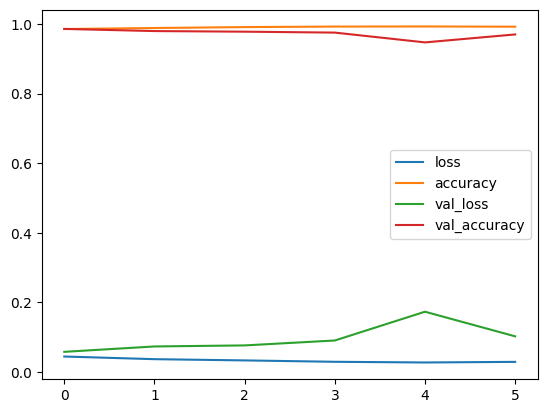

In [52]:
pd.DataFrame(history.history).plot()

#### Question 19-

In [53]:
model.evaluate(X_test,y_test)

61/61 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9774


[0.08709127455949783, 0.9774358868598938]

In [54]:
x_new=X_test[:3]

In [55]:
actual=y_test[:3]
actual

1505    1
1419    0
3163    1
Name: type, dtype: int64

In [56]:
y_prob=model.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 80ms/step


array([[1.   ],
       [0.068],
       [1.   ]], dtype=float32)

In [57]:
actual

1505    1
1419    0
3163    1
Name: type, dtype: int64

In [58]:
## So as we can see that the predicted value is 0.999,0.347,0.997 for the actual values of 1,0,1 which is a good prediction of accuracy 0.97%